In [32]:
# step1: enter image
# step2: take a copy, make it gray scale
# step3: take the gray image and apply threshold filter that show the most lighten and darken pixels
# step4: take copy1 apply blur filter using median filter in 35 angle and make the image transperancy 50%
# step5: take copy2 apply blur filter using median filter in 35 angle and make the image transperancy 50%
# step6: filter the black pixels and make it tranperance
# step7: paste this filter


In [33]:
import cv2 as cv
import matplotlib.pyplot as plt
import math
import numpy as np

In [ ]:
def debug_image(image, title='', type=None):
    if not type:
        plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

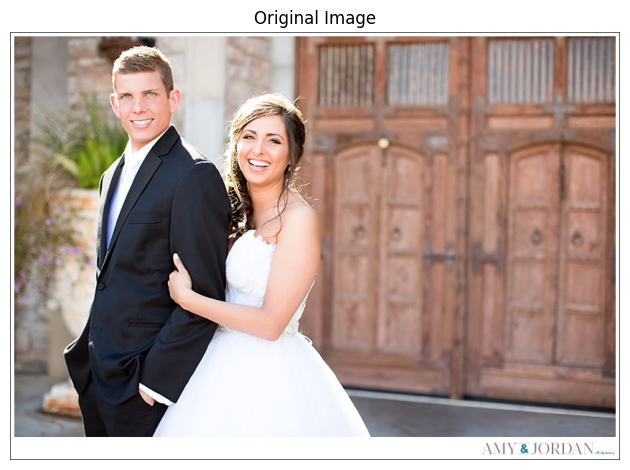

In [ ]:
# upload image
original_image_path = '2.jpg'
output_path = 'output_test2.png'
brightness = 0.5
max_dimmed = 220

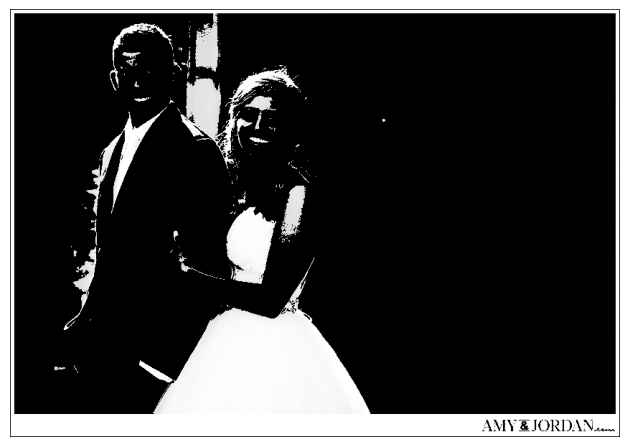

In [ ]:
# apply gray scale filter and threshol

In [ ]:
def motion_blur(original_image_path, size=100, angle=35, alpha=0.5):
    original_image = cv.imread(original_image_path, cv.IMREAD_UNCHANGED)

    filter = original_image.copy()
    filter = cv.cvtColor(filter, cv.COLOR_RGB2GRAY)
    

    _, filter = cv.threshold(filter,max_dimmed,255,cv.THRESH_TOZERO)
    gray = cv.convertScaleAbs(filter, alpha=1.0, beta=0)

    # Convert grayscale to 3-channel if needed
    rgb = original_image.copy()
    rgba = np.zeros((rgb.shape[0], rgb.shape[1], 4), dtype=np.uint8)
    rgba[:, :, :3] = rgb
    
    if len(gray.shape) == 2:
        gray_bgr = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)
    else:
        gray_bgr = gray.copy()

    gray_rgba = np.zeros((gray_bgr.shape[0], gray_bgr.shape[1], 4), dtype=np.uint8)
    gray_rgba[:, :, :3] = gray_bgr

    
    # First motion blur
    kernel = np.zeros((size, size))
    kernel[(size-1)//2, :] = np.ones(size)
    kernel = cv.warpAffine(kernel, cv.getRotationMatrix2D((size/2-0.5, size/2-0.5), angle, 1.0), (size, size))  
    kernel = kernel * (1.0 / np.sum(kernel))
    layer1 = cv.filter2D(gray_rgba.copy(), -1, kernel)
    
    cv.addWeighted(layer1, alpha, rgba, 1, 0, rgba)

    # Second motion blur
    kernel = np.zeros((size, size))
    kernel[(size-1)//2, :] = np.ones(size)
    kernel = cv.warpAffine(kernel, cv.getRotationMatrix2D((size/2-0.5, size/2-0.5), -angle, 1.0), (size, size))  
    kernel = kernel * (1.0 / np.sum(kernel))
    layer2 = cv.filter2D(gray_rgba.copy(), -1, kernel)
    
    cv.addWeighted(layer2, alpha, rgba, 1, 0, rgba)
    
    return rgba


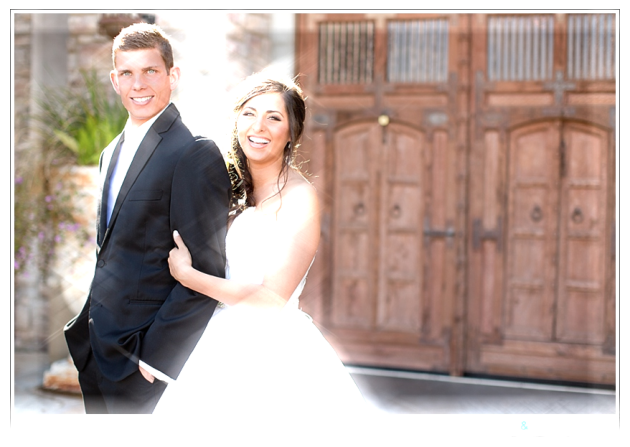

True

In [ ]:
result = motion_blur(original_image_path, alpha=brightness)

debug_image(result)
cv.imwrite(output_path, cv.cvtColor(result, cv.COLOR_RGBA2RGB))